In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# 读取面Shapefile
polygons = gpd.read_file(r'e:\work\sv_jourdan\arcgis\data\topython\polygon.shp')

# 读取点Shapefile
points = gpd.read_file(r'e:\work\sv_jourdan\arcgis\data\topython\point.shp')

# 确保两个GeoDataFrames的CRS相同
points = points.to_crs(polygons.crs)

#Spatial join between points and polygons
joined = gpd.sjoin(points, polygons, how="inner", op="within")

# 查看结果
joined.head()

C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,id,lng,lat,score,geometry,index_right,NAME_2
0,4,113.551578,22.156971,7,POINT (113.55158 22.15697),1,Nossa Senhora do Carmo
1,6,113.563485,22.172165,2,POINT (113.56349 22.17217),1,Nossa Senhora do Carmo
3,8,113.567327,22.155746,7,POINT (113.56733 22.15575),1,Nossa Senhora do Carmo
4,10,113.561514,22.159147,8,POINT (113.56151 22.15915),1,Nossa Senhora do Carmo
7,13,113.544701,22.164086,2,POINT (113.54470 22.16409),1,Nossa Senhora do Carmo


In [28]:
grouped = joined.groupby('NAME_2')['score'].apply(list)

In [40]:
grouped
# type(grouped)

NAME_2
Cotai                      [8, 8, 8, 7, 7, 8, 8, 2, 7, 7, 2, 2, 7, 4, 7, ...
Nossa Senhora de Fátima    [8, 8, 7, 7, 8, 7, 8, 8, 7, 8, 7, 2, 8, 4, 8, ...
Nossa Senhora do Carmo     [7, 2, 7, 8, 2, 7, 8, 7, 4, 8, 7, 4, 8, 7, 8, ...
Santo António              [7, 8, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 8, 7, 7, ...
São Francisco Xavier       [8, 7, 7, 7, 8, 7, 7, 7, 2, 2, 8, 2, 4, 2, 8, ...
São Lourenço               [8, 4, 7, 7, 7, 4, 7, 7, 8, 8, 7, 7, 7, 7, 7, ...
São Lázaro                 [7, 8, 7, 8, 8, 7, 7, 4, 7, 4, 4, 8, 7, 8, 4, ...
Sé                         [8, 2, 2, 7, 7, 8, 8, 8, 4, 2, 8, 8, 8, 7, 4, ...
Name: score, dtype: object

In [69]:
# 创建一个新的DataFrame，其中包含NAME_2和对应的score列表
df = pd.DataFrame(grouped).reset_index()

In [81]:
df.shape[0]

8

In [91]:
dict={}
for i in range(df.shape[0]):
    dict[df.iloc[i,0]] = df.iloc[i,1]

C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


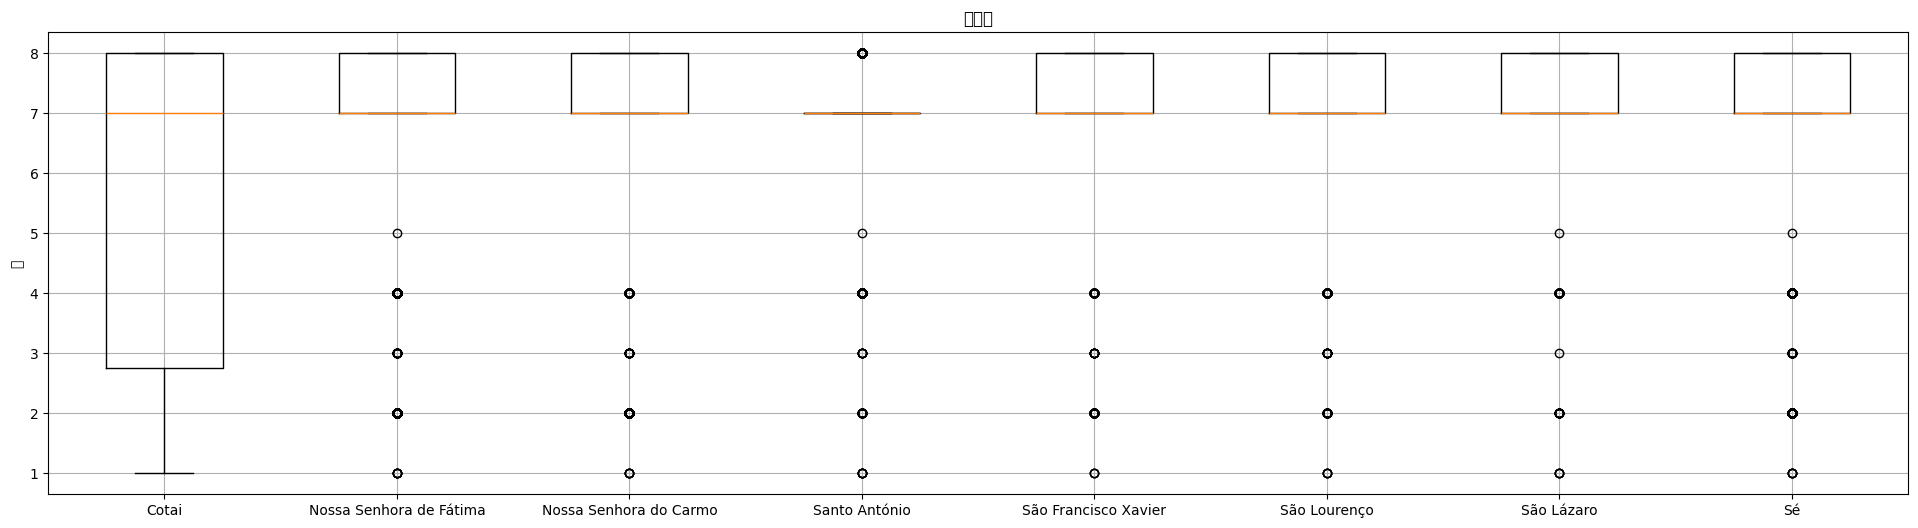

In [102]:
import matplotlib.pyplot as plt
# Creating the box plot
plt.figure(figsize=(24, 6))
plt.boxplot(dict.values(), labels=dict.keys())
plt.title("箱型图")
plt.ylabel("值")
plt.grid(True)
plt.show()


C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


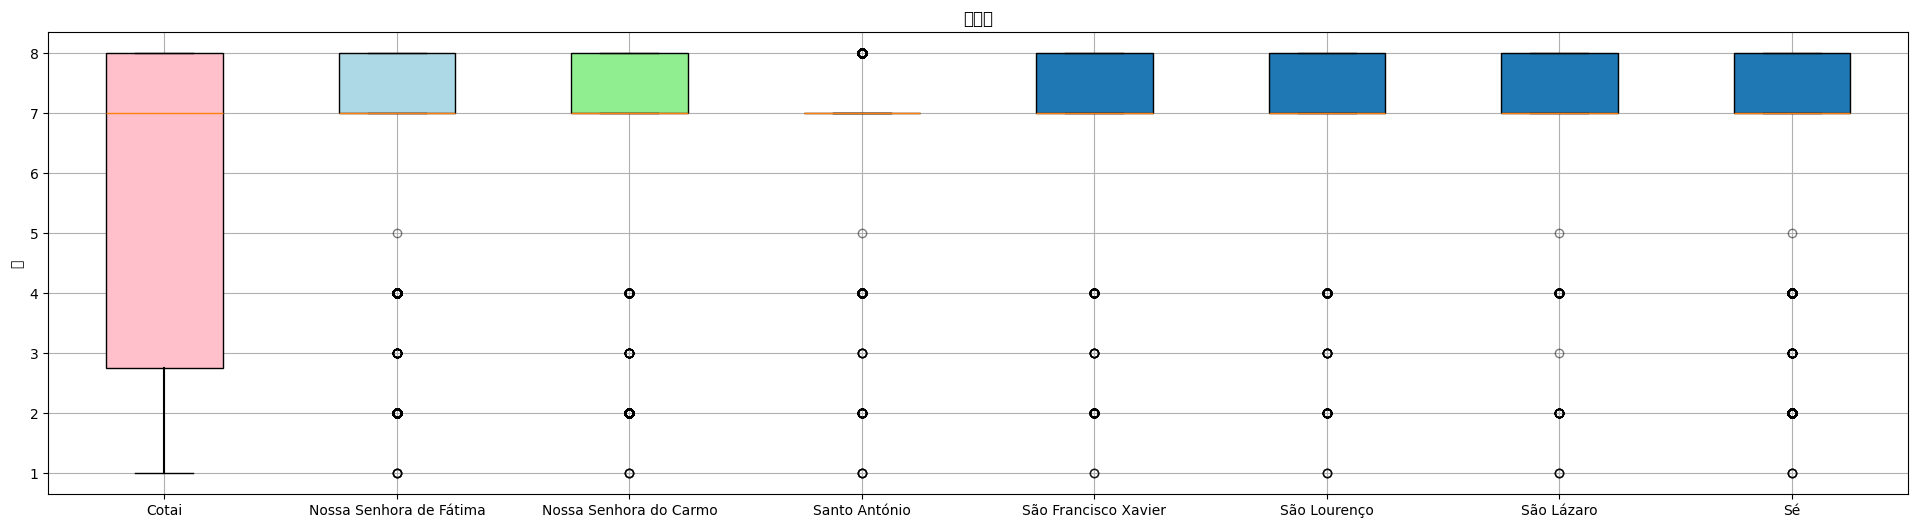

In [104]:
import matplotlib.pyplot as plt

# 假设这是你的数据字典
dict_data = dict

# 创建箱型图
plt.figure(figsize=(24, 6))
bplot = plt.boxplot(dict_data.values(), labels=dict_data.keys(), patch_artist=True)

# 设置箱体颜色
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# 设置须的颜色
for whisker in bplot['whiskers']:
    whisker.set(color='black', linewidth=1.5)

# 设置离群点的颜色
for flier in bplot['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

plt.title("箱型图")
plt.ylabel("值")
plt.grid(True)
plt.show()


In [62]:
import pandas as pd
import numpy as np

# 创建一个包含随机数据的DataFrame
data = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randn(100) + 1,
    'C': np.random.randn(100) - 1
})


In [63]:
data

,A,B,C
0,-0.318481,2.909105,-0.740452
1,-0.103694,2.121163,-1.302876
2,-0.292148,3.249576,-1.266671
3,-0.153979,1.705236,-0.006083
4,-0.780348,2.667072,0.873686
...,...,...,...
95,-0.218134,2.341237,-0.971500
96,1.418604,1.921460,-0.588178
97,0.685758,-0.284312,-3.266636
98,0.153485,1.598959,-0.223978


In [ ]:

# 绘制箱型图
data.boxplot()

# 显示图表
import matplotlib.pyplot as plt
plt.show()
